# ADA final exam (Fall 2024)

This exam consists of 2 tasks. The two tasks are independent of each other. You can solve them in any order.

## Task 1: Natural Language Processing (50 pts)
This part of the exam will analyze a real-world negotiation dataset:

Two participants take the role of campsite neighbors and negotiate for Food, Water, and Firewood packages, based on their individual preferences and requirements. This design keeps the task tractable, while still facilitating linguistically rich and personal conversations.

At the end of each negotiation, both negotiators receive an outcome score (`outcome`) reflecting their success in achieving their goals. The dataset is divided into two data frames:

1. `df_negotiations`, with columns:
    - `negotiation_id`: the negotiation identifier
    - `agent`: the agent active in that turn, either `mt_agent_1` or `mt_agent_2` (first and second to interact)
    - `message`: the message sent to the other agent
    - `turn`: the negotiation turn
2. `df_meta`, meta information for each negotiation with the outcome and agent background:
    - `gender`: (male, female, other)
    - `age`: integer
    - `outcome`: integer

We are interested in finding out: what makes a good (/bad) negotiator?

### Part 1: Coding Questions (29 pt)

In [49]:
import warnings
warnings.simplefilter('ignore')

In [50]:
import pandas as pd

df_negotiations = pd.read_csv('negotiations.csv')
df_negotiations.head()

,agent,message,negotiation_id,turn
0,mturk_agent_1,Hello! 🙂 Let's work together on a deal for the...,0,0
1,mturk_agent_2,Hey! I'd like some more firewood to keep my do...,0,0
2,mturk_agent_1,I need firewood as well. We have a large group...,0,1
3,mturk_agent_2,I see. 😮 What are you least interested in?,0,1
4,mturk_agent_1,We can make do without extra water. Can we tra...,0,2


In [51]:
df_meta = pd.read_csv('negotiations_meta.csv')
df_meta.head()

,agent,age,gender,negotiation_id,outcome
0,mturk_agent_1,31,female,797,21
1,mturk_agent_2,26,male,797,15
2,mturk_agent_1,65,male,909,18
3,mturk_agent_2,34,female,909,23
4,mturk_agent_1,26,male,135,26


**1.1 (2 pt)**
/Discussion:/ We are interested in analyzing negotiation outcomes by analyzing language usage. In order to use TF-IDF to accomplish this, we will treat all turns from one negotiator in a single negotiation as a "document". Why would this definition of "document" be preferred over the following two alternatives? Give at least one argument per alternative.

- A) Each individual turn is a document
- B) The entire negotiation dialogue of both negotiators is a document

[your answer]
A) This ways doesn't allow to analyse the turns by their authors 
B) This is way to difficult to sparate and use 

**1.2 (3 pt)**

[A, 1 pt] Use the negotiation dataset to create a new dataframe called `df_document` with the following columns:
- `negotiation_id`
- `agent`
- `document`

Here, document is defined as described in question 1.1. That is: concatonate messages into a single string and split by the special character `"\n"`.

In [82]:
df_document = df_negotiations[['negotiation_id','agent']]

df_neg = df_negotiations.groupby(by=['agent', 'negotiation_id'])

df_neg.head()

,agent,message,negotiation_id,turn
0,mturk_agent_1,Hello! 🙂 Let's work together on a deal for the...,0,0
1,mturk_agent_2,Hey! I'd like some more firewood to keep my do...,0,0
2,mturk_agent_1,I need firewood as well. We have a large group...,0,1
3,mturk_agent_2,I see. 😮 What are you least interested in?,0,1
4,mturk_agent_1,We can make do without extra water. Can we tra...,0,2
...,...,...,...,...
14266,mturk_agent_1,Oh ok. I'm a little lazy when it comes to gath...,999,2
14267,mturk_agent_2,So you get 3 firewood and 2 food? Are you sure?,999,3
14268,mturk_agent_1,If that's fine with you!,999,3
14269,mturk_agent_2,I think this deal is fair to both parties and ...,999,4


In [ ]:

df_document['document'] = "\n".join(df_neg['message']) ## Try to join by negotiation id to get all the turn from one negotition as one document
df_document.head()


[B, 2pt] Next, merge this new dataframe with the `df_meta` dataframe. Print the the size and first five rows of the final dataframe

In [71]:
df_final = df_meta.merge(df_document,on=['negotiation_id', 'agent'])
print(df_final.shape)
df_final.head(5)

(14273, 6)


,agent,age,gender,negotiation_id,outcome,document
0,mturk_agent_1,31,female,797,21,Hello! 🙂 Let's work together on a deal for the...
1,mturk_agent_1,31,female,797,21,Hello! 🙂 Let's work together on a deal for the...
2,mturk_agent_1,31,female,797,21,Hello! 🙂 Let's work together on a deal for the...
3,mturk_agent_1,31,female,797,21,Hello! 🙂 Let's work together on a deal for the...
4,mturk_agent_1,31,female,797,21,Hello! 🙂 Let's work together on a deal for the...


**1.3 (7 pt)**
We would like to analyze the difference between "best" and "worst" performers based on `outcome`, top and bottom 10% respectively.

[A, 2 pt] Find the top and bottom 10% thresholds for the `outcome` columns and print them.

In [72]:
percent_10 = round(0.1*df_final.shape[0])

top_10 = df_final['outcome'][:percent_10]
print("top 10 percent : ", top_10)

bottom_10 = df_final['outcome'][:-percent_10]
print("bottom 10 percent : ", bottom_10)

top 10 percent :  0       21
1       21
2       21
3       21
4       21
        ..
1422    23
1423    23
1424    23
1425    23
1426    23
Name: outcome, Length: 1427, dtype: int64
bottom 10 percent :  0        21
1        21
2        21
3        21
4        21
         ..
12841    20
12842    20
12843    20
12844    20
12845    20
Name: outcome, Length: 12846, dtype: int64


[B, 1pt] Create a TF-IDF matrix using the `TfidfVectorizer` form `sklearn`, setting `max_features=100` and `stop_words="english"`. Print the resulting TF-IDF matrix shape.

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100, stop_words="english", input='content')
tfidf = vectorizer.fit_transform(df_final['document'])
print(tfidf.shape)


KeyboardInterrupt: 

[C, 4pt] Use your thresholds and the TF-IDF matrix to print the top 10 terms for each type of negotiatior (i.e., the best and worst performing negotiators from question 1.3.A).

**1.4 (8 pt)**
You never get a second chance at a first impression! Let's investigate if the same goes for negotiations...

[A, 1pt] Create a new df_document that only takes into account the first three (3) turns of each negotiator in a negotiation. Again, merge on the df_meta dataframe and print the resulting size.

In [108]:
df_document2 = df_negotiations.groupby(['negotiation_id', 'agent']).apply(lambda x : x.head(3))[['message','turn']].reset_index()
df_document2.head(10)

,negotiation_id,agent,level_2,message,turn
0,0,mturk_agent_1,0,Hello! 🙂 Let's work together on a deal for the...,0
1,0,mturk_agent_1,2,I need firewood as well. We have a large group...,1
2,0,mturk_agent_1,4,We can make do without extra water. Can we tra...,2
3,0,mturk_agent_2,1,Hey! I'd like some more firewood to keep my do...,0
4,0,mturk_agent_2,3,I see. 😮 What are you least interested in?,1
5,0,mturk_agent_2,5,We could do without the water as well. I'm wil...,2
6,1,mturk_agent_1,14,I am good. I am pretty excited for the trip th...,0
7,1,mturk_agent_1,16,"Yes, Hopefully the weather holds up. So I was ...",1
8,1,mturk_agent_1,18,"Ok, I am willing to give you one food, in exch...",2
9,1,mturk_agent_2,13,Hello. How are you?,0


In [111]:
df_final2 = df_meta.merge(df_document2,on=['negotiation_id', 'agent'])

df_final2.head()

,agent,age,gender,negotiation_id,outcome,level_2,message,turn
0,mturk_agent_1,31,female,797,21,11109,Hello. I am also hoping to get extra supplies....,0
1,mturk_agent_1,31,female,797,21,11111,I think that is fair but then I will need 1 wa...,1
2,mturk_agent_1,31,female,797,21,11113,Now lets talk about the extra firewood. Becaus...,2
3,mturk_agent_2,26,male,797,15,11108,Hello there! I am looking for extra supplies!🙂,0
4,mturk_agent_2,26,male,797,15,11110,"I need food too unfortunately. So, how about I...",1


[B, 1pt] Calculate the median negotiation outcome. Then, add a column called success to the df_document dataframe that is 1 if the outcome column is more than the median and 0 otherwise. Print the median outcome.

In [113]:
median_outcome = df_final2['outcome'].median()
print("median outcome", median_outcome)

median outcome 19.0


In [116]:
df_final2['sucess'] = df_final2['outcome'].apply(lambda x : 1 if x>median_outcome else 0)
df_final2.head()

,agent,age,gender,negotiation_id,outcome,level_2,message,turn,sucess
0,mturk_agent_1,31,female,797,21,11109,Hello. I am also hoping to get extra supplies....,0,1
1,mturk_agent_1,31,female,797,21,11111,I think that is fair but then I will need 1 wa...,1,1
2,mturk_agent_1,31,female,797,21,11113,Now lets talk about the extra firewood. Becaus...,2,1
3,mturk_agent_2,26,male,797,15,11108,Hello there! I am looking for extra supplies!🙂,0,0
4,mturk_agent_2,26,male,797,15,11110,"I need food too unfortunately. So, how about I...",1,0


[C, 2pt] Create a TF-IDF matrix called `X` based on `df_document` using the following settings:

`max_features=100, stop_words="english, ngram_range=(1, 2)`

Additionally, create a variable `y` that corresponds to the success column. Finally, use `sklearn.model_selection.train_test_split` to split your data into a train and test set using parameters `test_size=0.2` and `random_state=99`.

Print the shape of the TF-IDF and the shape of your train and test sets.

In [121]:
vectorizer = TfidfVectorizer(max_features=100, stop_words="english", ngram_range=(1,2))
X =  vectorizer.fit_transform(df_final2['message'])
print("X shape:",X.shape)

y = df_final2['sucess']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

print("X_train shape ", X_train.shape)
print("X_test shape ", X_test.shape)
print("y_train shape ", y_train.shape)
print("y_test shape ", y_test.shape)

X shape: (6168, 100)
X_train shape  (4934, 100)
X_test shape  (1234, 100)
y_train shape  (4934,)
y_test shape  (1234,)


[D, 2pt] Use your prepared data to train a logistic regression model (`sklearn.linear_model.LogisticRegression`). Then, with the trained model predict on the test set and print a classification report (`sklearn.metrics.classification_report`).

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.97      0.77       785
           1       0.31      0.02      0.04       449

    accuracy                           0.63      1234
   macro avg       0.47      0.50      0.40      1234
weighted avg       0.52      0.63      0.50      1234



[E, 2pt] Use the weights of your trained model to show which terms mostly strongly correlate with high and low outcomes. Print the best five terms for each.

**1.5 (9 pt)**
You are concerned about potential “confounding” factors for your results in the previous question. Specifically, you would like to investigate the effect of “gender” on the outcomes.

[A, 3pt] Visualize the outcomes stratified by gender using a bar plot with standard deviation around the mean. Make sure you use clear x- and y-axis labels, a title, and a legend.

[B, 2pt] Perform a T-Test with a confidence interval of 0.95 to check if the outcomes based on gender are statistically significantly different. Print the resulting t-statistic, the p-value, and your interpretation of the result.

[C, 2pt] Finally, we would like to test if the gender distribution between high and low negotiation performers is significantly different. Please perform a chi-square test on the gender distribution of those negotiators scoring above the median outcome. Use a confidence interval of 0.95 and print the resulting chi-square statistic, p-value, and your interpretation of the result.

[D, 2pt] /Discuss:/ In addition to the gender attribute, could you think of other measurable factors in this dataset that could be tested as confounders? List at least two more and explain why.

### Part 2: Insight Questions (15 pt)

**2.1 (3pt)**
In the context of analyzing negotiation turns, why would TF-IDF be more suitable than simple word frequency counts when trying to identify distinctive communication patterns between successful and unsuccessful negotiations?

Because TF-IDF adjusts word importance by considering both the frequency of a term within a document and its rarity across the corpus.

**2.2 (2pt)**
How would you modify the standard TF-IDF implementation to account for the temporal nature of negotiation turns? Consider that early turns might be more important for setting the tone of the negotiation than later turns.

I would weight the turns and pass those weight to the TF-IDF

**2.3 (3 pt)**
In our negotiation dataset, successful negotiators might simply write longer messages. How could this create a misleading interpretation of our TF-IDF results, and what would be a simple way to test for this potential bias?

This could create a bias as the TF-IDF will consider that someone talking longer is more important. We could test this bias using a regression regarding the length of a message and checking for how much it count. 

**2.4 (3pt)**
In our negotiation dataset, consider these two opening messages from different agents:

Agent A: "I propose we split the resources fairly" Agent B: "I suggest we divide the assets equitably"

These messages are semantically very similar but use different vocabulary. Explain:

- a) How TF-IDF would process these messages differently
- b) How word embeddings (like Word2Vec) would handle them
- c) Why this distinction matters for negotiation analysis

- a)
- b)
- c)

**2.5 (4pt)**
Staying in the context of negotiations, explain why N-gram models such as bigrams might be more informative than unigrams for predicting negotiation outcomes. Provide two examples of bigrams that would be particularly meaningful in negotiation contexts but would lose their significance if split into unigrams.

[your answer]

## Task 2: Analysis of Co-Author Network (50 pts)


In this part, you will analyze a reserach publication dataset derived from 
[social influence analysis in large-scale networks](https://keg.cs.tsinghua.edu.cn/jietang/publications/KDD09-Tang-et-al-Social-Influence-Analysis.pdf) (the paper itself is irrelevant to this exam, don't waste time reading it).

The citation data is extracted from DBLP, ACM, MAG (Microsoft Academic Graph), and other sources. Each paper is associated with abstract, authors, year, venue, and title.

Dataset: [citation dataset](https://cn.aminer.org/citation)

Paper: [social influence analysis in large-scale networks](https://keg.cs.tsinghua.edu.cn/jietang/publications/KDD09-Tang-et-al-Social-Influence-Analysis.pdf)


### Download data from the web

#### For Linux and MacOS:
```bash
wget https://lfs.aminer.cn/lab-datasets/citation/citation-network1.zip
unzip citation-network1.zip
ls -l outputacm.txt
```

#### For windows we recommend using WSL (Windows Subsystem for Linux) with above commands or directly downloading the file from the browser at 
https://lfs.aminer.cn/lab-datasets/citation



In [126]:
import numpy as np
import pandas as pd
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

from helper import load_data_as_df


# Define the file path
file_path = "outputacm.txt"

# Load the data into a DataFrame
df = load_data_as_df(file_path)

# check if the index column is the same as the index 

print(f"Dataset loaded with {len(df)} entries.")
print(f"colums: {df.columns}")

Dataset loaded with 629814 entries.
colums: Index(['title', 'authors', 'year', 'venue', 'references', 'abstract'], dtype='object')


**3.1 (6 pts)**: Analyze Papers Published Per Year

**Objective:**  
Analyze and visualize publication trends to understand how the research field has evolved over time.

#### Instructions:
1. Group the data by the year of publication and count the number of papers for each year (2 pts).
2. Plot a bar chart showing the number of papers published per year from **1990 to 2010**. (2 pts)
3. Focus on the pattern between **1996 and 2004**:
   - **Discuss:** Describe any notable trends or changes in the number of publications during this period. (2 pts)
   - **Bonus:** Hypothesize potential reasons for the observed pattern.  (2 pts)
     *Hint: Consider events or trends related to the dataset's focus on computer science.* 


In [140]:
# TODO
#1
paper_per_year = df.groupby(by='year')['title'].count()
paper_per_year.head()

year
1900.0    1
1941.0    1
1947.0    1
1949.0    1
1950.0    2
Name: title, dtype: int64

Text(0.5, 1.0, 'Plot of number of paper per year')

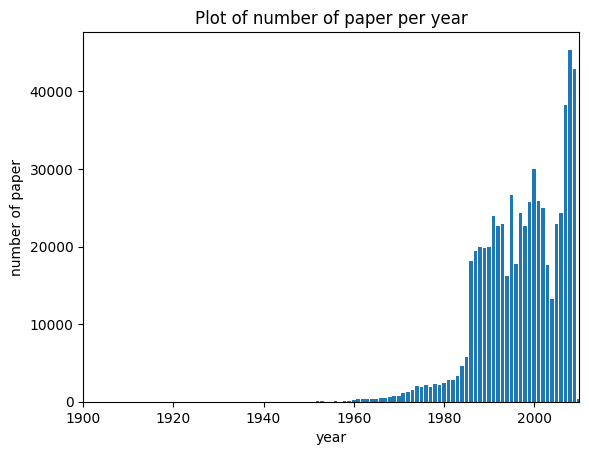

In [145]:
#2 
plt.bar(paper_per_year.index, paper_per_year.values)
plt.xlim((1900, 2010))
plt.xlabel('year')
plt.ylabel('number of paper')
plt.title('Plot of number of paper per year')

Text(0.5, 1.0, 'Plot of number of paper per year')

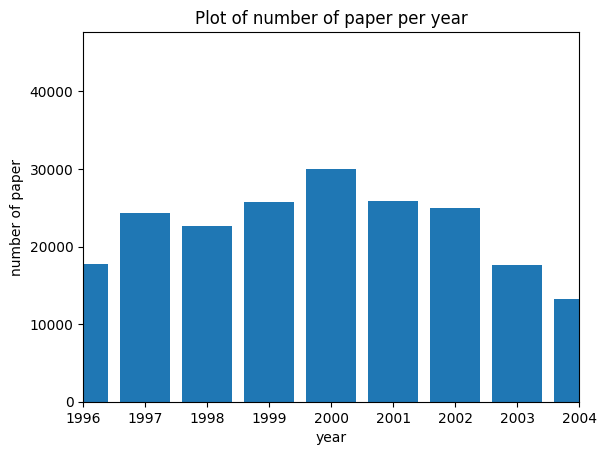

In [146]:
#3
plt.bar(paper_per_year.index, paper_per_year.values)
plt.xlim((1996, 2004))
plt.xlabel('year')
plt.ylabel('number of paper')
plt.title('Plot of number of paper per year')

In [147]:
#3 betwwen 1996 and 2004 the publication follow kind of  a gaussian distribution, with a peak in the 2000
# as it correspond to the year 2000 bug, and i suppose more paper were produced this year. 

**3.2 (4 pts)**: Authors Per Paper Analysis

With the rise of interdisciplinary research, multi-authored papers are becoming more common. This task will help us understand collaboration dynamics in the academic world.

#### Instructions:
- Get the number of authors for each paper and calculate the percentage of papers with four or more authors. (2 pts)
- Plot a histogram to show the frequency distribution of the number of authors per paper (2 pts)(choose `bins=range(0, 30)` and set y-axis to log scale).

In [154]:
df.head()

,title,authors,year,venue,references,abstract
0,Automated Deduction in Geometry: 5th Internati...,"[Hoon Hong, Dongming Wang]",2006.0,,[],None
1,A+ Certification Core Hardware (Text & Lab Man...,[Charles J. Brooks],2003.0,,[],None
2,Performance engineering in industry: current p...,"[Ahmed E. Hassan, Parminder Flora]",2007.0,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...
3,"Dude, You Can Do It! How to Build a Sweeet PC","[Darrel Creacy, Carlito Vicencio]",2005.0,,[],Whether you're frustrated with current PC offe...
4,What Every Programmer Needs to Know about Secu...,"[Neil Daswani, Anita Kesavan]",2006.0,,[],None


In [ ]:
# TODO
df['n_authors'] = df['authors'].apply(lambda x: len(x)) #crete a new column for number of authors.

four_authors = len(df[df['n_authors']>=4]) / len(df['n_authors']) *100

print('percentage of paper with 4 or more authors', four_authors)
df.head()

82970
percentage of paper with 4 or more authors 13.173730656987617


,title,authors,year,venue,references,abstract,n_authors
0,Automated Deduction in Geometry: 5th Internati...,"[Hoon Hong, Dongming Wang]",2006.0,,[],None,2
1,A+ Certification Core Hardware (Text & Lab Man...,[Charles J. Brooks],2003.0,,[],None,1
2,Performance engineering in industry: current p...,"[Ahmed E. Hassan, Parminder Flora]",2007.0,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...,2
3,"Dude, You Can Do It! How to Build a Sweeet PC","[Darrel Creacy, Carlito Vicencio]",2005.0,,[],Whether you're frustrated with current PC offe...,2
4,What Every Programmer Needs to Know about Secu...,"[Neil Daswani, Anita Kesavan]",2006.0,,[],None,2


Text(0.5, 1.0, 'frequency distribution of the number of authors per paper')

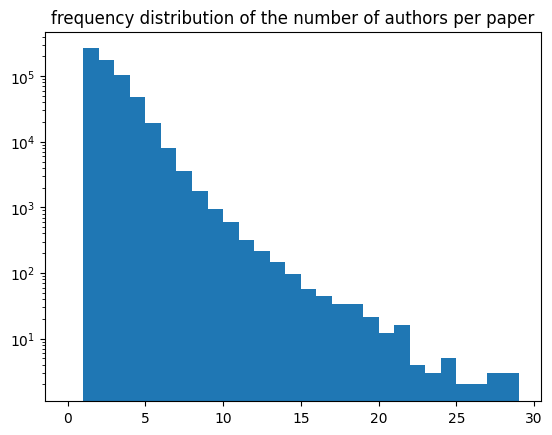

In [167]:
plt.hist(df['n_authors'], bins=range(0,30))
plt.yscale('log')
plt.title('frequency distribution of the number of authors per paper')

**3.3 (4 pts)**: Temporal Collaboration Trends

Collaboration dynamics can change over time. This task will help us understand how collaboration trends have evolved in the academic world.

#### Instructions:
- Group the data by publication year, calculate the average number of authors per paper for each year, and create a line plot to visualize how it has changed from 1990 to 2010 (1 pt).
- **Discuss:** There has been a hypothesis that the number of authors per paper has increased over time. Based on the plot, do you agree with this hypothesis ? (1 pt)
- Compute the P-value of the hypothesis that the average number of authors per paper after 2000 is significantly higher than before 2000. (2 pts)

Text(0.5, 1.0, 'evolution of number of authors per year from 1990 to 2010')

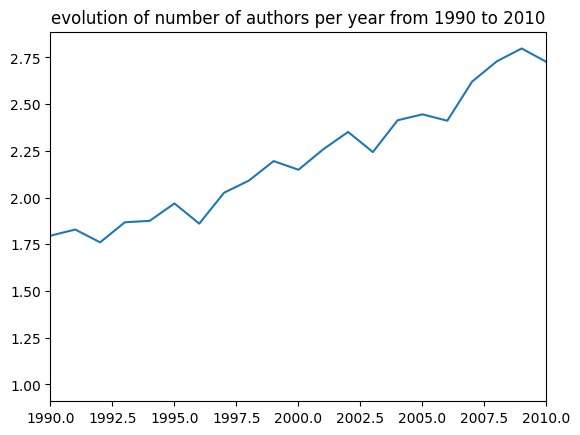

In [176]:
# TODO
avg_author_per_year = df.groupby(by='year')['n_authors'].mean()

plt.plot(avg_author_per_year.index, avg_author_per_year.values)
plt.xlim((1990, 2010))
plt.title('evolution of number of authors per year from 1990 to 2010')


In [177]:
# yes the number of authors increases with year, but not that drastically, and thaht is not constant over years,
# we see a general increase trends. 
# I agree this hypothesis in general but that is not true year by year. 

In [184]:
from scipy import stats

before_2000 = df.loc[df['year']<2000]['n_authors']
after_2000 = df.loc[df['year']>=2000]['n_authors']

stats.ttest_ind(after_2000, before_2000)

TtestResult(statistic=194.86008664473866, pvalue=0.0, df=629803.0)

**3.4 (6 pts)**: Build a Co-Author Network

Co-author networks help us visualize and quantify collaborations in academia. Such networks are critical for identifying influential researchers and their role in fostering connections within their communities. Construct a network where nodes represent authors and edges represent collaborations.

#### Instructions:
- Create a graph where: (5 pts)
  - Nodes: Each node represents a unique author, identified by their name in the authors field of the dataset.
  - Edges: There is an edge between two nodes if the corresponding authors have co-authored at least one paper. The weight of the edge represents the number of papers the two authors have co-authored together.
- After constructing the network, print the following information: (1 pt)
  - The total number of nodes (authors) in the network.
  - The total number of edges (collaborations) in the network.

Example:

For a paper authored by ["Alice", "Bob", "Charlie"], the graph should include:
- Nodes: Alice, Bob, Charlie.
- Edges: Alice-Bob, Alice-Charlie, Bob-Charlie, each with a weight of 1 (assuming no other collaborations between these pairs).


In [206]:
df.head(10)

,title,authors,year,venue,references,abstract,n_authors
0,Automated Deduction in Geometry: 5th Internati...,"[Hoon Hong, Dongming Wang]",2006.0,,[],None,2
1,A+ Certification Core Hardware (Text & Lab Man...,[Charles J. Brooks],2003.0,,[],None,1
2,Performance engineering in industry: current p...,"[Ahmed E. Hassan, Parminder Flora]",2007.0,Proceedings of the 6th international workshop ...,[],This panel session discusses performance engin...,2
3,"Dude, You Can Do It! How to Build a Sweeet PC","[Darrel Creacy, Carlito Vicencio]",2005.0,,[],Whether you're frustrated with current PC offe...,2
4,What Every Programmer Needs to Know about Secu...,"[Neil Daswani, Anita Kesavan]",2006.0,,[],None,2
5,Interpreting Kullback-Leibler divergence with ...,"[Shinto Eguchi, John Copas]",2006.0,Journal of Multivariate Analysis,[436405],Kullback-Leibler divergence and the Neyman-Pea...,2
6,Digital Media: Transformations in Human Commun...,"[Lee Humphreys, Paul Messaris]",2006.0,,[],None,2
7,TOPP---the OpenMS proteomics pipeline,"[Oliver Kohlbacher, Knut Reinert, Clemens Gröp...",2007.0,Bioinformatics,[],Motivation: Experimental techniques in proteom...,7
8,Type Graphics and MacIntosh,[John Blaint],1987.0,,[],None,1
9,Adaptive Hypermedia and Adaptive Web-Based Sys...,"[Vincent Wade, Helen Ashman, Barry Smyth]",2006.0,,[],None,3


In [249]:
# TODO
G = nx.MultiGraph()
nodes_list  = list(df['authors'].explode().unique())
several_authors = df[df['n_authors']>1]['authors']
edges_list = [[i[0],j] for i in df['authors'] for j in i[1:]]



In [250]:


G.add_nodes_from(nodes_list)
G.add_edges_from(edges_list) 
#should have used Gadd_weighted_edges_from(edges_list, weight = 'weight')
#but then edges_list should be like [source, target, weight] and I can't figure out to get weight
# I tried the following but it run for too long 

# edges_list_weighted = []

# for i  in edges_list:
#    w = edges_list.count(i)
#    edges_list_weighted.append(i.append(w))
# G.add_weighted_edges_from(edges_list_weighted, weight='weight')
print(G)


MultiGraph with 595775 nodes and 708160 edges


**3.5 (4 pts)**: Analyze the Co-Author Network

Connected components in a co-author network can reveal isolated research communities or dominant research hubs. Analyzing the largest component helps us understand the core of academic collaboration

#### Instructions:
- The degree of a node is the number of edges connected to it. In the context of the co-author network, this represents the number of distinct co-authors an author has collaborated with. Compute the average degree of the network (1 pt).
- Connectivity of the Network:
  - A network is fully connected if there is a path between every pair of nodes. Determine if the co-author network is fully connected (2 pt). (Hint: A single answer is not enough here. You need to use a method to verify the connectivity of the network.)
  - Can you tell how many authors are part of the largest connected component? How much does this account for the total number of authors in the network? (2 pt)
<!-- - Compute the average clustering coefficient of the network. -->

In [237]:
# TODO
deg_val = [val for (_, val) in G.degree()]
avg_deg = np.mean(deg_val)
print("avergade degree of the graph:", avg_deg)


avergade degree of the graph: 2.3772732994838655


In [240]:
nx.is_connected(G)

#The graph is not connected. We could have tested it using the degree values get above, if there is some value to 0
# it means that there is no connexion so the graph is not connecetd. 



False

**3.6 (4 pts)**: Top Authors by Collaborations

#### Instructions:
- Get the degree for all nodes in the network and print the top 10 authors by degree (1 pt) (Note: some entries (e.g., "II," "III," "Jr.") may not represent real authors due to data quality issues. Please keep them in the list and don't do any cleaning.)
- A high degree  indicates that an author has collaborated with many other authors. However, it does not consider if the collaborations happen multiple times between the same authors. A weighted degree would be a better measure to consider the number of collaborations between authors. Get the top 10 authors by weighted degree. P.S. The weighted degree is the sum of the weights of the edges connected to the node. (1 pt)
- Which two authors have the highest number of collaborations? How many papers have they co-authored together? (2 pt)

In [245]:
# TODO
deg_val = [(node, val) for (node, val) in G.degree()]

deg_val_sort = sorted(deg_val, key=lambda tup: tup[1], reverse=True)
print(deg_val_sort[:10])



[(' Jr.', 3779), (' III', 701), (' II', 395), ('Gary B. Shelly', 319), ('Elisa Bertino', 276), ('Wei Wang', 244), ('Noga Alon', 241), ('Ming Li', 232), ('Philip S. Yu', 204), ('Michael Stonebraker', 177)]


**3.7 (4 pts)**: Analyze the reference/citation information 

Understanding the citation patterns of papers helps reveal their academic impact and how knowledge propagates through the research community. In this task, you will analyze the reference and citation relationships within the dataset.

First, let's create a citation network where:
- Nodes: Each node represents a unique paper, identified by its id in the dataset.
- Edges: There is an edge from paper A to paper B if paper A cites paper B. 


#### Instructions:
- **Discuss:** Is it reasonable that the citation network contains cycles?  What would a cycle( not self loop) in the citation network represent? (2 pt)
- Which paper has the highest number of citations? How many papers cite this paper? (1 pt)
- Which paper has the highest number of references? How many papers does this paper cite? (1 pt)


In [251]:
# TODO
G_ = nx.MultiGraph()
G_ = nx.from_pandas_edgelist(df, df['title'], df['references'])

KeyError: "None of [Index(['Automated Deduction in Geometry: 5th International Workshop, ADG 2004, Gainesville, FL, USA, September 16-18, 2004, Revised Papers (Lecture Notes in Computer ... / Lecture Notes in Artificial Intelligence)',\n       'A+ Certification Core Hardware (Text & Lab Manual)',\n       'Performance engineering in industry: current practices and adoption challenges',\n       'Dude, You Can Do It! How to Build a Sweeet PC',\n       'What Every Programmer Needs to Know about Security (Advances in Information Security)',\n       'Interpreting Kullback-Leibler divergence with the Neyman-Pearson lemma',\n       'Digital Media: Transformations in Human Communication',\n       'TOPP---the OpenMS proteomics pipeline', 'Type Graphics and MacIntosh',\n       'Adaptive Hypermedia and Adaptive Web-Based Systems: 4th International Conference, AH 2006, Dublin, Ireland, June 21-23, 2006, Proceedings (Lecture Notes in Computer Science)',\n       ...\n       'SENTINEL: a semantic business process monitoring tool',\n       'Editorial: color in image and video processing',\n       'Effectiveness and usability of an online help agent embodied as a talking head',\n       'Busy period analysis of finite QBD processes',\n       'The Grid as a Single Entity: Towards a Behavior Model of the Whole Grid',\n       'Mining A', 'Review article',\n       'Multimodal system evaluation using modality efficiency and synergy metrics',\n       'Computer System Architecture',\n       'Oppositional target domain estimation using grid-based simulation'],\n      dtype='object', length=629814)] are in the [columns]"

**3.8 (3 pts)**: Analyze the Citation Distribution 

The citation distribution of papers can provide insights into the impact of research publications. In this task, you will analyze the citation distribution in the dataset.

<!-- - Plot the number of papers having a certain level of citation x (x-axis) against x (y-axis) in a log-log scale. -->
- Create a frequency distribution where the x-axis represents the number of citations and the y-axis represents the number of papers that have that number of citations. Plot two scatters plot of the frequency distribution first in a normal scale and second in a log-log scale. (2 pts)
- **Discuss**: What does the plot suggest about the citation distribution in the dataset? (1 pt)

In [ ]:
# TODO

**3.9 (3 pts)**: Central Tendency of Citation Distribution

**Discuss:**: There are different ways to describe the central tendency of a citation distribution., such as mean. Determine the measure you think best represents the dataset and explain your reasoning. (Hint: Consider the distribution of the citation data above)


In [ ]:
# TODO

**3.10 (2pts)**: Network Centrality Measures

PageRank is a measure of influence based on link structure. Applying it to citations allows us to rank papers by their academic importance

#### Instructions:
- You are tasked with curating the 'Top 10 Influential Papers' from this dataset. Use PageRank to justify your selection and display the top 10 papers titles by page rank. (2 pts)
- **bonus**: Identify patterns among the top-ranked papers. (2 pts)


In [ ]:
# TODO

**3.11 (5 pts)**: Bridge Papers

Bridge papers are those that connect different research communities. They are essential for fostering interdisciplinary research and knowledge transfer. 

#### Instructions: 
- Build a small citation network that only includes papers published in 2005. (2 pts)
- Which measurement can help us identify bridge papers in a citation network?  (2 pt)
- Try to find top10 bridge papers in the dataset. By looking at their titles, can you identify the research communities they connect? (Pick 2 papers) (1 pt)



In [ ]:
# TODO

**3.12 (5 pts)**: Author-Citation Network

In the previous tasks, we analyzed the co-author network and paper-citation network. In this task, we will analyze the author-citation network, where:
- Nodes: Each node represents a unique author, identified by their name in the authors field of the dataset.
- Edges: There is an edge from author A to author B if author A cites a paper authored by author B. 
- The weight of the edge represents the total number of citations from author A to author B.

#### Instructions:
- Given that we have a Author-Paper Matrix $A$ where each row represents an paper and each column represents an author. The value in the matrix is 1 if the author has contributed to the paper, 0 otherwise. And we also have a Paper-Paper citation matrix $P$ (square matrix) where the value at coordinates (i, j) is 1 if paper j cites paper i, 0 otherwise.
- How can you get a Author-Author citation matrix from the above two matrices by matrix multiplication? (You don't need to implement this, just give the formula) (2 pts)
- Author A may have never cited author B, but author A might have cited a few papers which cited works by author B. This can be seen as a 2nd degree citation.  More formally, a 2nd degree citation matrix $C_2$ has at each cell (i, j) the number 2nd degree citations from author i to author j. How can you get a 2nd degree citation matrix from the Author-Paper Matrix $A$ and Paper-Paper citation matrix $P$? (You don't need to implement this, just give the formula) (2 pts)
- Can you generalize this to nth degree citation matrix? (1 pt)

In [ ]:
# TODO